a. Постройте линейную регрессию для заданного набора данных. Варианты заданий:
   1. exam_регр.csv
   1. cars.csv
   1. bikes_rent.csv
   1. garments_worker_productivity.csv
   1. Salary.csv
   1. Salary Data.csv
   1. winequality-red.csv
   1. уровень шума.csv
   1. Concrete_Data.xls
   1. зар. плата.xls
   1. продажа автомобилей (из объявлений).xls
   1. ПРОДАЖИ.xls
   1. AirQualityUCI.xlsx
   1. Nedvig.xlsx
   1. Real estate valuation data set.xlsx
   
b. Проверьте и оцените точность построенной модели

c. Постройте графики модели в координатах целевой переменной и любых двух факторов

In [156]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
drive.mount('/content/drive')
sns.set()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
data = pd.read_csv('/content/drive/MyDrive/Academic/ML/lab5/data/cars.csv', delimiter=';')
data.head()

,Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,1,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189
1,2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172
2,3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183
3,4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186
4,5,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197


In [158]:
data

,Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,1,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189
1,2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172
2,3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183
3,4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186
4,5,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,424,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5,197,21,28,3450,105,186
424,425,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5,242,20,26,3450,105,186
425,426,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6,268,19,26,3653,110,190
426,427,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4,170,22,29,2822,101,180


In [159]:
data.dtypes

Obs              int64
Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice         object
EngineSize     float64
Cylinders       object
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [160]:
data.loc['.' == data['Cylinders'],'Cylinders'] = 'None'

In [161]:
data['Cylinders'].sort_values()

y = data['Invoice'].fillna(data['Invoice'].mode()[0])
y = y.str[1:].str.replace(',', '.').astype(float)

X = data.drop(['Invoice', 'MSRP', 'Obs'], axis=1)

X = X.drop_duplicates()

array([[<Axes: title={'center': 'EngineSize'}>,
        <Axes: title={'center': 'Horsepower'}>,
        <Axes: title={'center': 'MPG_City'}>],
       [<Axes: title={'center': 'MPG_Highway'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Wheelbase'}>],
       [<Axes: title={'center': 'Length'}>, <Axes: >, <Axes: >]],
      dtype=object)

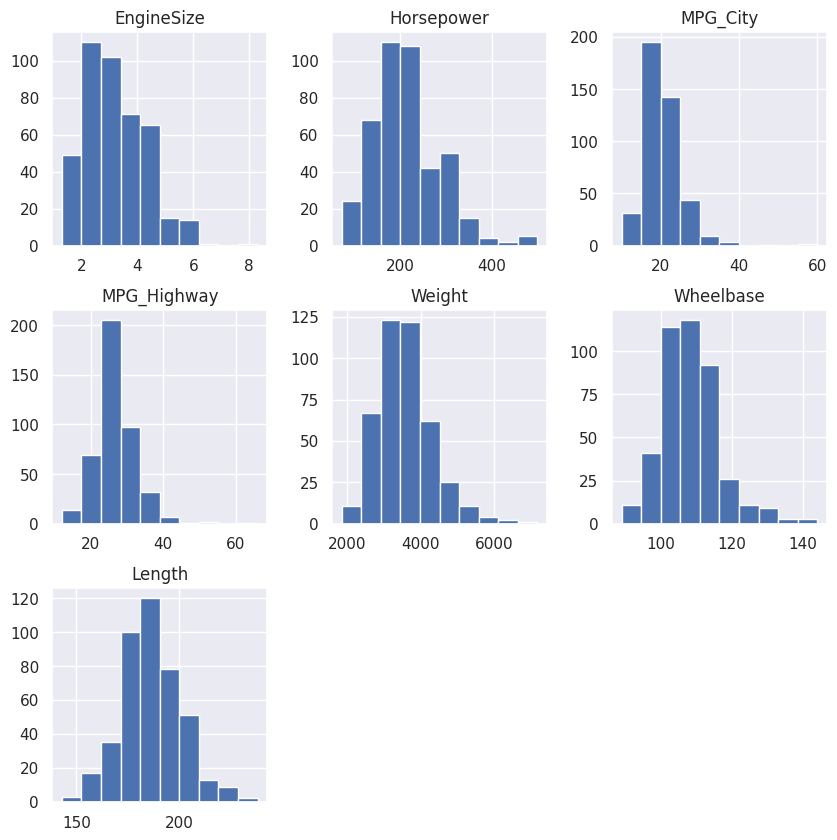

In [162]:
X.hist(X.columns, figsize=(10, 10))

In [163]:
data.nunique()

Obs            428
Make            38
Model          425
Type             6
Origin           3
DriveTrain       3
MSRP           410
Invoice        425
EngineSize      43
Cylinders        8
Horsepower     110
MPG_City        28
MPG_Highway     33
Weight         348
Wheelbase       40
Length          67
dtype: int64

<ipython-input-164-c53efef1ce0a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(), annot=True, square=True)


<Axes: >

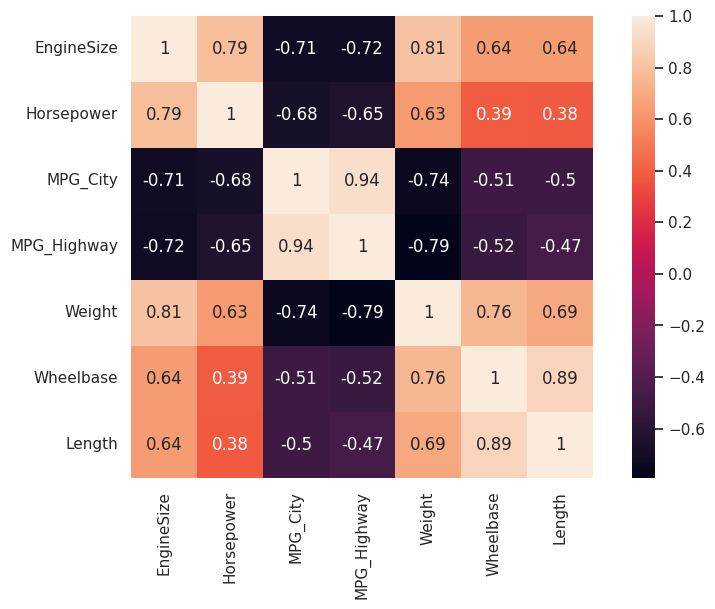

In [164]:
plt.figure(figsize = (10,6))
sns.heatmap(X.corr(), annot=True, square=True)

<ipython-input-165-e6202fb79283>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(), annot=True, square=True)


<Axes: >

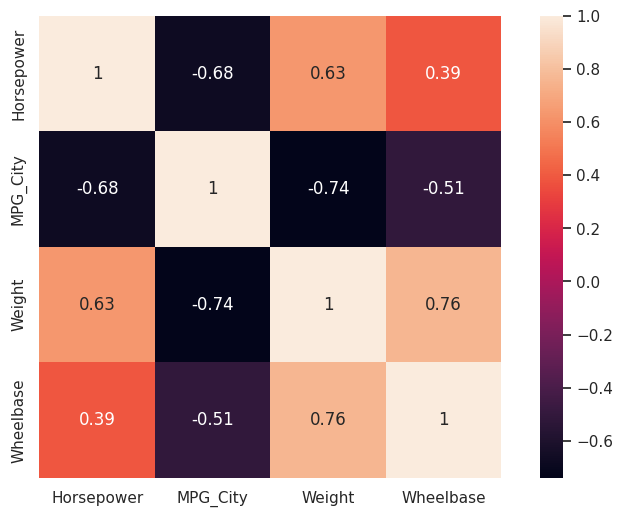

In [165]:
# Drop high correlated features
X = X.drop(['EngineSize', 'MPG_Highway', 'Length'], axis=1)
plt.figure(figsize = (10,6))
sns.heatmap(X.corr(), annot=True, square=True)

In [166]:
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=99
)

In [167]:
from sklearn.preprocessing import StandardScaler

X_test_not_scaled = X_test

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [168]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)
test_predictions = regressor.predict(X_test)

print('test mse: ', mean_squared_error(y_test, test_predictions))
print('r2 score: ', r2_score(y_test, test_predictions))
print('coef: ',regressor.coef_)

test mse:  22.627336858929354
r2 score:  0.8216964851471434
coef:  [ 2.74826567e+00  9.86991609e-01  5.36548098e+00 -5.90247070e-01
  7.23146639e-01  5.55411239e-02  2.65023592e-01  1.13382185e-01
  6.07630429e-01 -3.84994502e-01 -4.36941249e-02 -1.83245911e-01
 -8.36056748e-01 -5.78530316e-01 -3.10277166e-01 -1.45360087e-01
 -3.65592060e-01  1.22767190e-02 -2.38991753e-01  1.05829334e+00
 -3.34720428e-02 -4.44462834e-01  1.21463953e-01  5.11755051e-01
  1.44375923e-01 -2.66220589e-01 -2.32302596e-01  1.75033830e+00
 -3.24679789e-01 -2.97966749e-01 -4.33702218e-01 -4.01352545e-02
 -3.00137173e-01  2.10488374e+00  2.66276275e-01 -2.27600946e-01
 -1.08991383e-01 -3.24801240e-01 -2.99884718e-01 -4.78119617e-01
 -4.72448710e-01  2.98649998e-02  2.64734457e-01  3.66389402e-01
  5.65210641e-02 -9.43689571e-16 -1.84736579e-01  3.19206704e-02
 -2.98762467e-01 -3.58765115e-01 -2.46827290e-01 -5.58220231e-03
  2.26525852e-01  2.70616862e-16 -1.28975646e-01 -1.49911272e-01
 -4.04545776e-01 -6.054

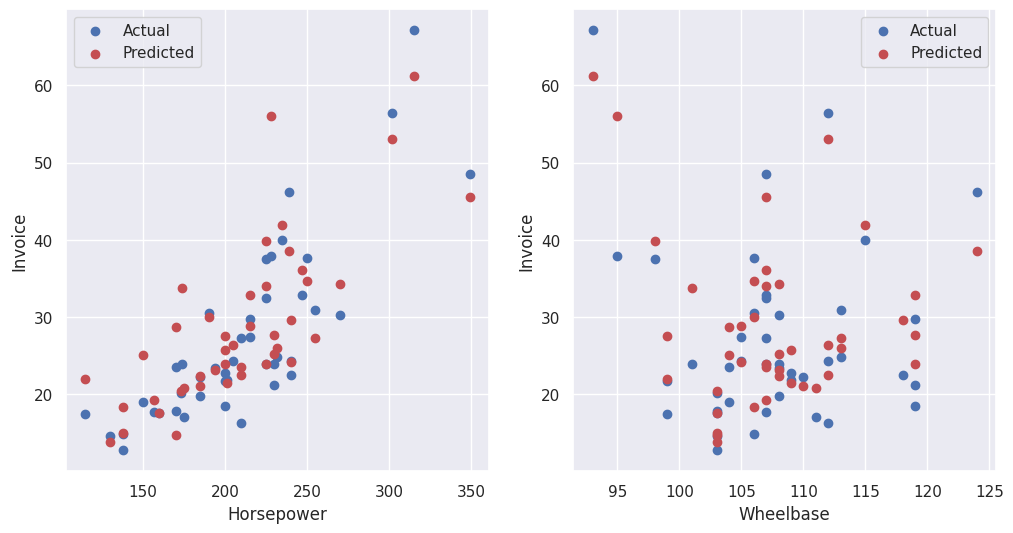

In [169]:
Feature1 = X_test_not_scaled['Horsepower']
Feature2 = X_test_not_scaled['Wheelbase']
Target = y_test  # целевая переменная


plt.figure(figsize=(12, 6))

# График для Horsepower
plt.subplot(1, 2, 1)
plt.scatter(Feature1, Target, color='b', label='Actual')
plt.scatter(Feature1, test_predictions, color='r', label='Predicted')
plt.xlabel('Horsepower')
plt.ylabel('Invoice')
plt.legend()

# График для Wheelbase
plt.subplot(1, 2, 2)
plt.scatter(Feature2, Target, color='b', label='Actual')
plt.scatter(Feature2, test_predictions, color='r', label='Predicted')
plt.xlabel('Wheelbase')
plt.ylabel('Invoice')
plt.legend()

plt.show()


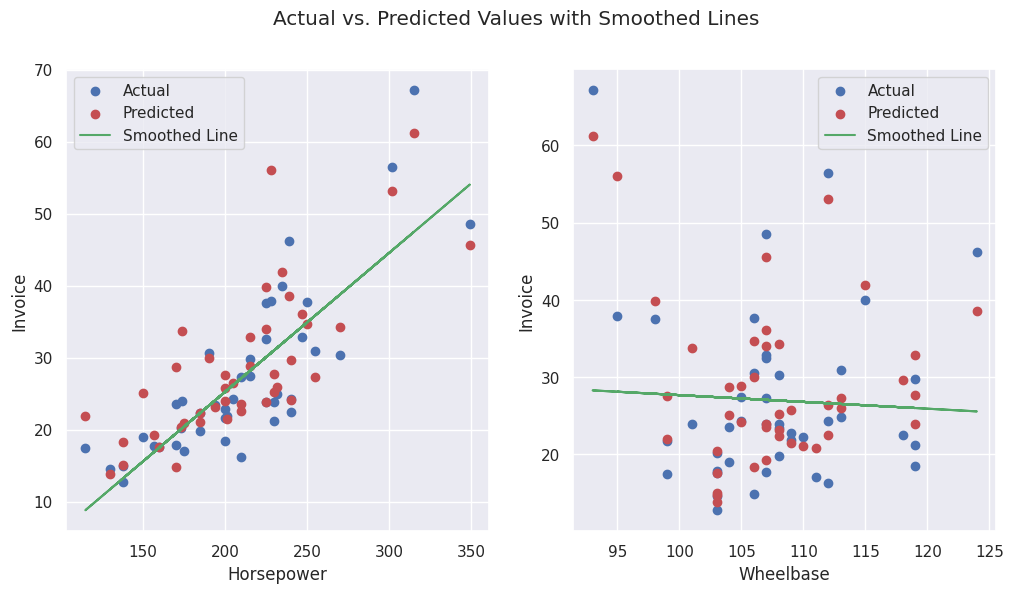

In [170]:
import numpy as np

Feature1 = X_test_not_scaled['Horsepower']
Feature2 = X_test_not_scaled['Wheelbase']
Target = y_test  # целевая переменная

plt.figure(figsize=(12, 6))

# Horsepower
plt.subplot(1, 2, 1)
plt.scatter(Feature1, Target, color='b', label='Actual')
plt.scatter(Feature1, test_predictions, color='r', label='Predicted')
plt.xlabel('Horsepower')
plt.ylabel('Invoice')
plt.legend()

# для Horsepower
polyfit1 = np.polyfit(Feature1, Target, 1)
plt.plot(Feature1, np.polyval(polyfit1, Feature1), color='g', label='Smoothed Line')
plt.legend()

# для Wheelbase
plt.subplot(1, 2, 2)
plt.scatter(Feature2, Target, color='b', label='Actual')
plt.scatter(Feature2, test_predictions, color='r', label='Predicted')
plt.xlabel('Wheelbase')
plt.ylabel('Invoice')
plt.legend()

# для Wheelbase
polyfit2 = np.polyfit(Feature2, Target, 1)
plt.plot(Feature2, np.polyval(polyfit2, Feature2), color='g', label='Smoothed Line')
plt.legend()

# Добавить заголовок
plt.suptitle('Actual vs. Predicted Values with Smoothed Lines')

plt.show()


# Классификация

In [171]:
data = pd.read_csv('/content/drive/MyDrive/Academic/ML/lab5/data/winequality-red.csv', delimiter=';')
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [173]:
data.shape

(1599, 12)

In [174]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: xlabel='quality', ylabel='count'>

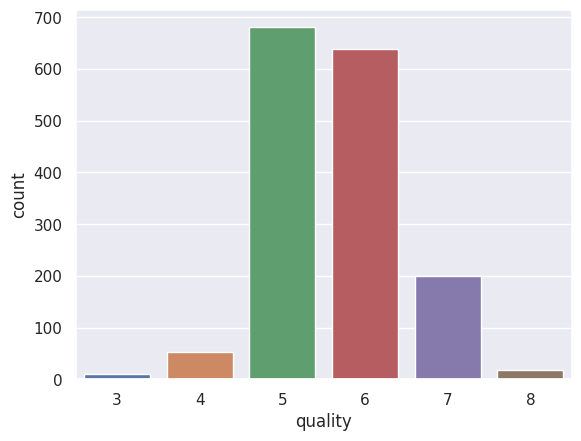

In [175]:
sns.countplot(x="quality", data=data)

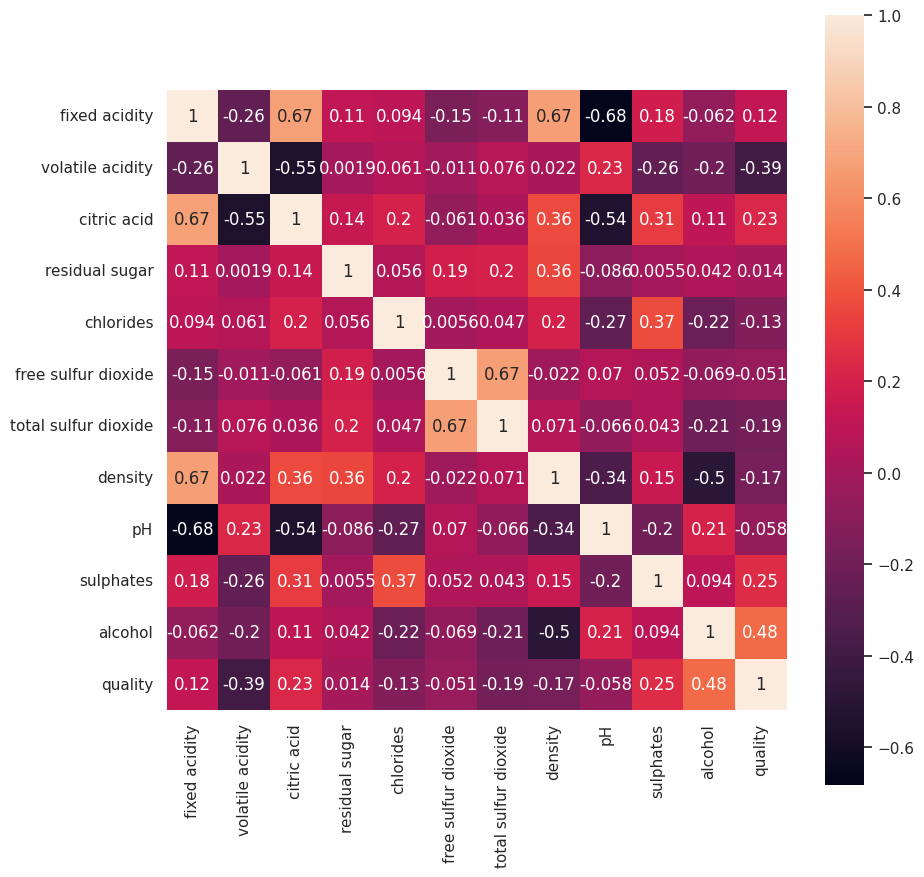

In [176]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(method='pearson'), annot=True, square=True)
plt.show()

In [177]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [178]:
data['quality'] = data['quality'].map({'bad' : 0, 'good' : 1})
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


0    1382
1     217
Name: quality, dtype: int64


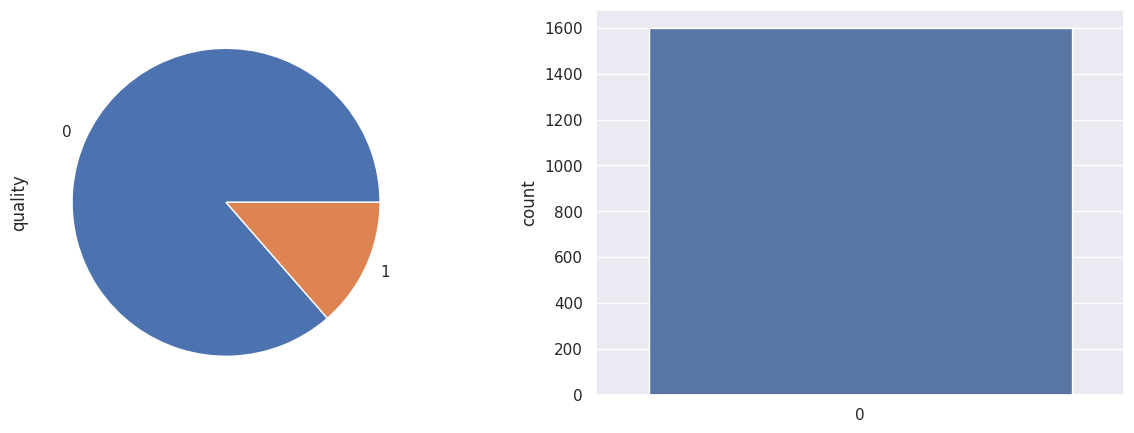

In [179]:
print(data['quality'].value_counts())
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(18, 5))
ax = ax.flatten()
data['quality'].value_counts().plot(x=0, y=1, kind='pie', figsize=(15,5), ax=ax[0])
sns.countplot(data['quality'], ax=ax[1])
plt.show()

In [180]:
X = data.drop('quality', axis = 1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [181]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_not_scaled = X_train
X_test_not_scaled = X_test


X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [182]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

model = clf.fit(X_train, y_train)
pred_gaussian = clf.predict(X_test)
print(pred_gaussian)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0
 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]


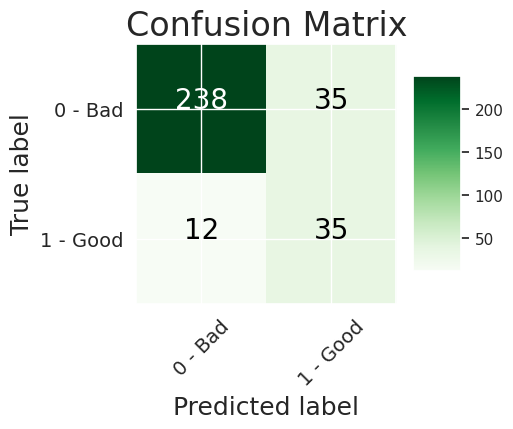

In [183]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    plt.figure(figsize = (5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # лейблы для плотов
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
             plt.text(j, i, format(cm[i, j], fmt),
             fontsize = 20,
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)


cm = confusion_matrix(y_test, pred_gaussian)
plot_confusion_matrix(cm, classes = ['0 - Bad', '1 - Good'],
                      title = 'Confusion Matrix')

K-Nearest Neighbour Classification

In [184]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN(n_neighbors=5, metric='minkowski', p=2,)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
Y_compare_knn = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_knn})
print(Y_compare_knn.head())
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_knn))

     Actual  Predicted
803       0          0
124       0          0
350       0          0
682       0          0
1326      0          0

Confussion matrix:
[[261  12]
 [ 28  19]]


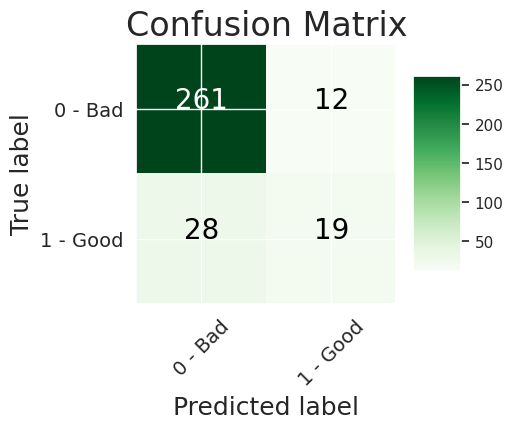

In [185]:
cm = confusion_matrix(y_test, pred_knn)
plot_confusion_matrix(cm, classes = ['0 - Bad', '1 - Good'],
                      title = 'Confusion Matrix')

Logistic Regression

In [186]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', random_state=42)
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

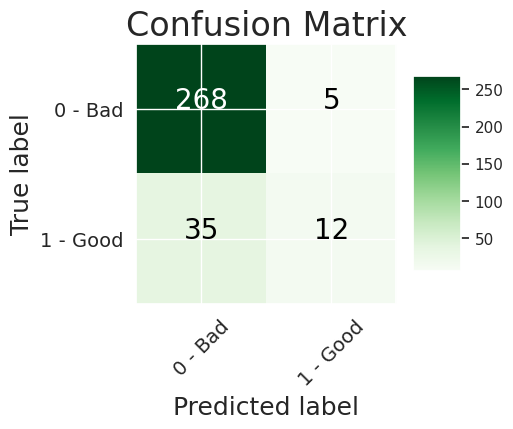

In [187]:
cm = confusion_matrix(y_test, pred_logreg)
plot_confusion_matrix(cm, classes = ['0 - Bad', '1 - Good'],
                      title = 'Confusion Matrix')

In [188]:
from sklearn.model_selection import cross_val_score

#K-fold cross validation
modelNames = ['Logistic Regression', 'K-Nearest Neighbour', 'Naive Bias']
modelClassifiers = [logreg, knn, clf]
models = pd.DataFrame({'modelNames' : modelNames, 'modelClassifiers' : modelClassifiers})
counter=0
score=[]
for i in models['modelClassifiers']:
  accuracy = cross_val_score(i, X_train, y_train, scoring='accuracy', cv=10)
  print('Accuracy of %s Classification model is %.2f' %(models.iloc[counter,0],accuracy.mean()))
  score.append(accuracy.mean())
  counter+=1

Accuracy of Logistic Regression Classification model is 0.89
Accuracy of K-Nearest Neighbour Classification model is 0.87
Accuracy of Naive Bias Classification model is 0.84


In [189]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.model_selection import cross_val_score

# tp / (tp + fn)
def calculate_recall(clf, X_train, y_train):
    recall_scorer = make_scorer(recall_score)
    recall = cross_val_score(clf, X_train, y_train, scoring=recall_scorer, cv=5)
    return recall.mean()

# tp / (tp + fp)
def calculate_precision(clf, X_train, y_train):
    precision_scorer = make_scorer(precision_score)
    precision = cross_val_score(clf, X_train, y_train, scoring=precision_scorer, cv=5)
    return precision.mean()

def calculate_f1_score(clf, X_train, y_train):
    f1_scorer = make_scorer(f1_score)
    f1 = cross_val_score(clf, X_train, y_train, scoring=f1_scorer, cv=5)
    return f1.mean()

# tn / (tn + fp)
def calculate_specificity(clf, X_train, y_train):
    def specificity_score(y_true, y_pred):
        tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
        specificity = tn / (tn + fp)
        return specificity

    specificity_scorer = make_scorer(specificity_score)
    specificity = cross_val_score(clf, X_train, y_train, scoring=specificity_scorer, cv=5)
    return specificity.mean()

modelNames = ['Logistic Regression', 'K-Nearest Neighbour', 'Naive Bias']
modelClassifiers = [logreg, knn, clf]
models = pd.DataFrame({'modelNames' : modelNames, 'modelClassifiers' : modelClassifiers})
counter = 0
score = []

for i in models['modelClassifiers']:
    # For Recall
    recall = calculate_recall(i, X_train, y_train)
    print('Recall of %s Classification model is %.2f' %(models.iloc[counter,0], recall))
    score.append(recall)

    # For Precision
    precision = calculate_precision(i, X_train, y_train)
    print('Precision of %s Classification model is %.2f' %(models.iloc[counter,0], precision))
    score.append(precision)

    # For F1 Score
    # F1=PPV+TPR2⋅PPV⋅TPR​=2⋅TP+FP+FN2⋅TP​.
    f1 = calculate_f1_score(i, X_train, y_train)
    print('F1 Score of %s Classification model is %.2f' %(models.iloc[counter,0], f1))
    score.append(f1)

    # For Specificity
    specificity = calculate_specificity(i, X_train, y_train)
    print('Specificity of %s Classification model is %.2f' %(models.iloc[counter,0], specificity))
    score.append(specificity)

    print()

    counter += 1


Recall of Logistic Regression Classification model is 0.34
Precision of Logistic Regression Classification model is 0.64
F1 Score of Logistic Regression Classification model is 0.44
Specificity of Logistic Regression Classification model is 0.97

Recall of K-Nearest Neighbour Classification model is 0.39
Precision of K-Nearest Neighbour Classification model is 0.53
F1 Score of K-Nearest Neighbour Classification model is 0.44
Specificity of K-Nearest Neighbour Classification model is 0.95

Recall of Naive Bias Classification model is 0.65
Precision of Naive Bias Classification model is 0.43
F1 Score of Naive Bias Classification model is 0.51
Specificity of Naive Bias Classification model is 0.87



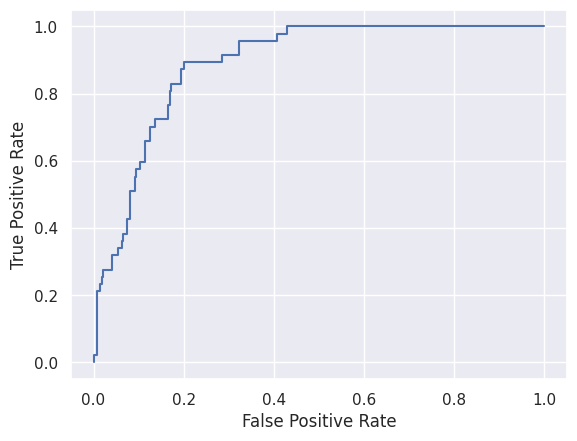

In [190]:
# Определяем метрики
from sklearn import metrics

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [191]:
from sklearn.metrics import roc_auc_score

# Получаем вероятности положительного класса для тестового набора данных
y_pred_proba = logreg.predict_proba(X_test)[:,1]

# Вычисляем AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)

print('AUC-ROC:', roc_auc)


AUC-ROC: 0.8903436988543372


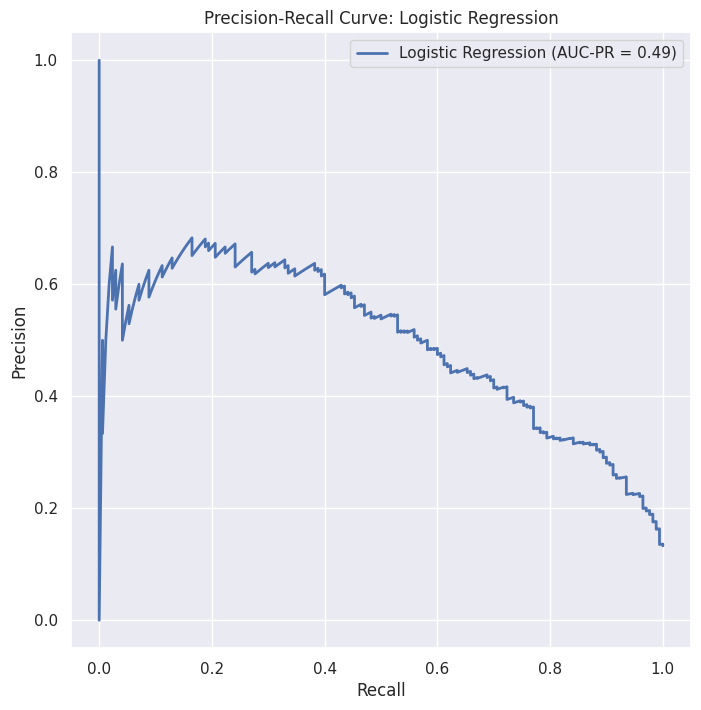

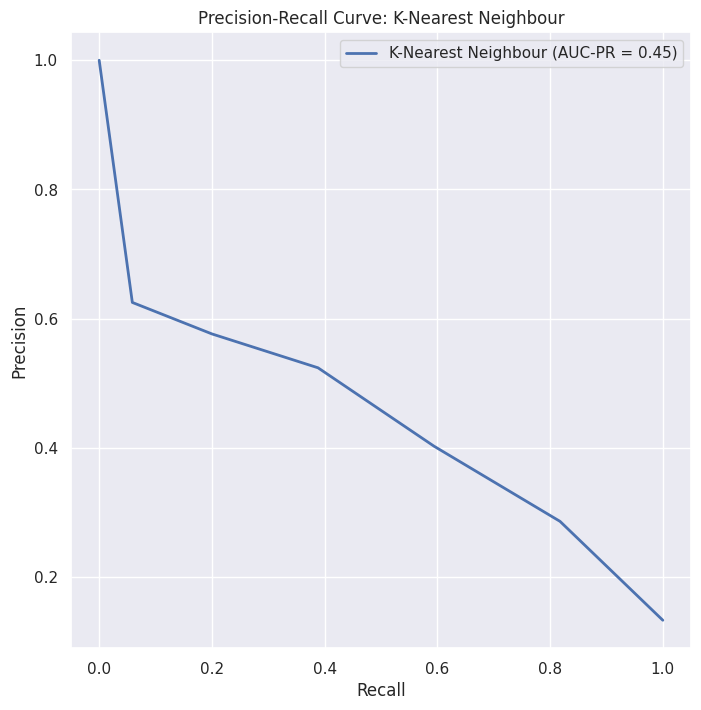

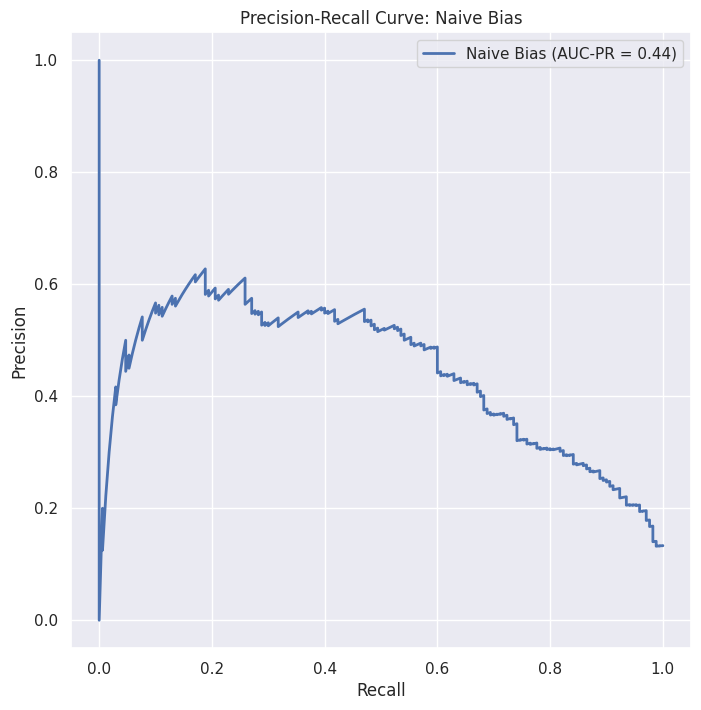

In [192]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_predict

def plot_pr_curve(y_true, y_scores, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    auc_pr = auc(recall, precision)

    plt.figure(figsize=(8, 8))
    plt.plot(recall, precision, label=f'{model_name} (AUC-PR = {auc_pr:.2f})', linewidth=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve: {model_name}')
    plt.legend(loc='best')
    plt.show()

modelNames = ['Logistic Regression', 'K-Nearest Neighbour', 'Naive Bias']
modelClassifiers = [logreg, knn, clf]
models = pd.DataFrame({'modelNames': modelNames, 'modelClassifiers': modelClassifiers})
counter = 0
score = []

for i in models['modelClassifiers']:
    # For Precision-Recall Curve and AUC-PR
    y_scores = cross_val_predict(i, X_train, y_train, method='predict_proba', cv=5)[:, 1]
    plot_pr_curve(y_train, y_scores, models.iloc[counter, 0])

    counter += 1
